Examining the Hidden Gems: Wine for Casuals Consumer

Matthew Sebsibe

**Introduction**

While researching topics to focus on I went to Total Wine to buy my sister a gift. There I felt overwhelmed by the analysis paralysis that is a Walmart for wine. Displayed in the chart below are some classifications of wine. It is very expanisve. There are over 10,000 wine grape varieties in the world. Some major categories include: red, white, rose, sparkling and fortified wine. Personally, I wanted to create a project that I felt would be useful to myself in understanding this massive space. In addition, my goal is to use Data Science to simplify the area. Wine is synonymous to snobbery, however, there are many great bottles for relatively cheap. I will also explore if higher priced wine is worth it, but that will be explained more in subsequent sections. 

<img src="https://thewinewankers.files.wordpress.com/2014/02/a-different-types-of-wine-infographic-chart3.png" width=1000 height=500 />

Helpful resources: 
The image found above is from the book Wine Folly. I highly reccomend this for beginners intimdated by all the complexities of wine. This book is a good first step in understanding some terms Sommeliers use and different components that distinguish varieties of wine. As an added bonus, the book provides a lot of wine/food pairings. This book is good to get at libraries for its outstanding visuals.

Youtube Channels:
https://www.youtube.com/user/askawinemaker/videos
https://www.youtube.com/user/WineAlign

I learn best through visual and audio means so seeing someone explain features of bottles as well as basic wine ettiquette has helped me and I believe can be useful to others.

For the analysis of our data we will follow the The Data Science Pipeline in order to understand more about the data in front of us 

**Disclaimer: This project is meant to explore the topic of wine in a healthy manner. Please practice safe and lawful consumption of alcohol. Be safe and know your limits.**

**Data Collection/Curation**

For my dataset, I was lucky to find one on Kaggle with over 100,000 entries. The link can be found here: https://www.kaggle.com/datasets/christopheiv/winemagdata130k . I was able to download this data in a CSV (Comma-separated values) file. What this means is a text-file that is seperated by commas to distinguish information. Within this dataset are many useful columns including the name of the bottle, country of origin, price, description, and points. Points refer to a score out of 100 that refer to the level of wine a sommelier would rate a wine. Wine Spectator a renowned wine magazine with 400000+ wine expert wine ratings has blind-taste tests of wine and scores wine using this scale:

95-100 Classic: a great wine

90-94 Outstanding: a wine of superior character and style

85-89 Very good: a wine with special qualities

80-84 Good: a solid, well-made wine

75-79 Mediocre: a drinkable wine that may have minor flaws

50-74 Not recommended

Different websites and magazines approach the scale differently, but the general trend is similar with preferences given to bottles over 90+ being excellent bottles. Without this dataset, the way I would approach scrapping is by doing a quick google search of wine data. Vivino is a great example of a website that stores many different reviewes of wine. However, it is very expansive and sorts by type of wine. So I would scrape a few thousand from each variety with a goal of about 10000+ reviews to have a good representation of bottom,mid, and high shelf wine from a multitude of wine varieties. Similar to Project 1, the data is tabulated fairly easily to scrape the HTML with BeautifulSoup. Luckly the dataset I found from Kaggle did a similar approach using data from WineMag. For the purposes of this project, the scale described above matches, but for Wine Magazine specific scale, that can be found in the link here: https://www.winemag.com/2010/04/09/you-asked-how-is-a-wines-score-determined/ . Wine Enthusiast Magazine also referred to as Wine Mag has some great resources for finding bottles of wine for every budget and is a great resource for beginners and experts alike to learn something new.

**Data Management / Representation**

For this project we will rely heavily on the Pandas library to represent our data. The matplot and seaborn library will be key in visualizing our data. Finally numpy will be key in preforming various operations on our data. As described above, the data is stored in a csv file. Once the file is imported into the Jupyter Notebook, all that is needed is to call the read_csv file to import all of the data stored. From there, it is the job of the data scientist to massage the data and make choices about missing data. For this data set, I can immediately drop the taster name, twitter handle, and unnamed column as none of these columns store useful data for our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Lets take a peek into our data.

In [2]:
#wine set before dropping unnecessary operations
wine_data = pd.read_csv("winemag-data-130k-v2.csv")

#Taster name and twitter tag are unnecesary for analysis
wine_data.drop("taster_name", axis=1, inplace=True)
wine_data.drop("taster_twitter_handle", axis=1, inplace=True)
wine_data.drop("Unnamed: 0", axis=1, inplace=True)

For the dataset we have many different characteristics described in the kaggle spec: 

country-The country that the wine originates from

description- An added description of some bottles in the dataset

designation-The vineyard within the winery where the grapes that made the wine are from

points-The point value that WineEnthusiast rated the wine on a scale of 1-100 

price-The cost for a bottle of the wine

province-The province or state that the wine is from

region_1:The wine growing area in a province or state (ie Napa)

region_2:Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley),

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   designation  92506 non-null   object 
 3   points       129971 non-null  int64  
 4   price        120975 non-null  float64
 5   province     129908 non-null  object 
 6   region_1     108724 non-null  object 
 7   region_2     50511 non-null   object 
 8   title        129971 non-null  object 
 9   variety      129970 non-null  object 
 10  winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.9+ MB


For this model, I have chosen to drop rows without a wine bottle name, price, and point value. These will be needed in later sections and since we have so many data points we will still have many values to work with as shown below.

In [4]:
#Dropping columns that do not have a price, point, or wine bottle name
before = len(wine_data.index)

wine_data = wine_data.dropna(subset=['price','points','title'])

after = len(wine_data.index)

tot = before - after
print("Number of values dropped = " + str(tot))

tot = tot/before
tot = tot*100
print("Percent of values dropped = " + str(tot) + "%")

print("Number of values left = " + str(after))

Number of values dropped = 8996
Percent of values dropped = 6.921544036746659%
Number of values left = 120975


**Since we still have over 120000 values to work with we can move forward with this model.**

In our model I utilized a CSV with data already in it. However, if we want to scrape data ourselves, we can take an approach similar to Project 1.

The approach I would take would be to find a website that has data formatted similar to the HTML table. There are many great websites to pick from like Vivino and WineMag. From there we can use, beautiful soup to help "prettify" our data and have it formatted to our liking. From there we call the pandas read_csv function in order to have that formatted into a data set similar to how we have our dataframe above. The import requests library I imported above is utilized to allow our data to get it using the requests library.

Explanatory Data Analysis

In [5]:
# Analyze Stats for Price
mean = np.mean(wine_data['price'])
median = np.median(wine_data['price'])
mini = np.min(wine_data['price'])
maxi = np.max(wine_data['price'])
stddev = np.std(wine_data['price'])

print('SUMMARY STATS FOR PRICE OF WINE IN THE DATASET')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

SUMMARY STATS FOR PRICE OF WINE IN THE DATASET
Mean:  35.363389129985535 
Std Dev:  41.022048119411714 
Median:  25.0 
Min:  4.0 
Max:  3300.0


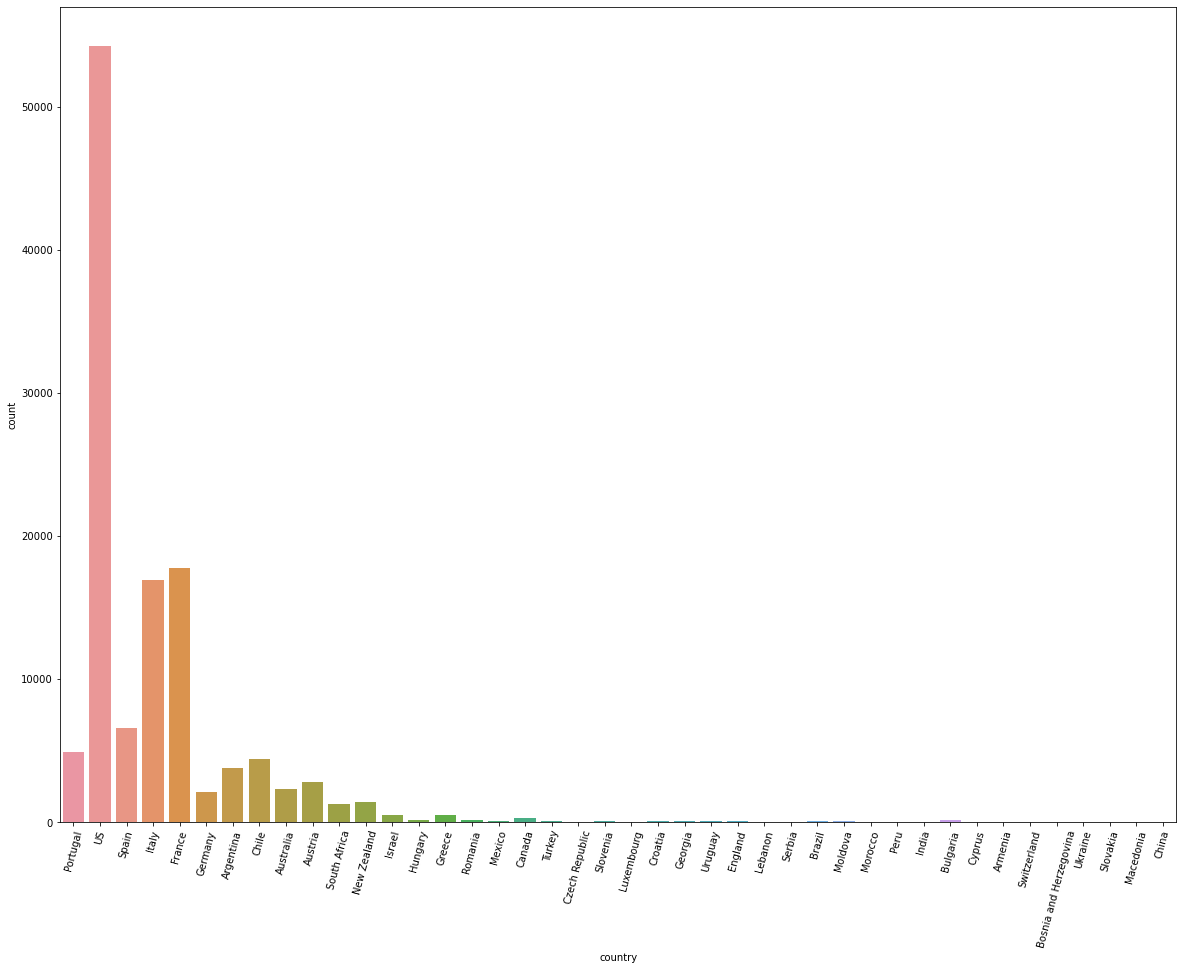

In [6]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x="country", data=wine_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.show()

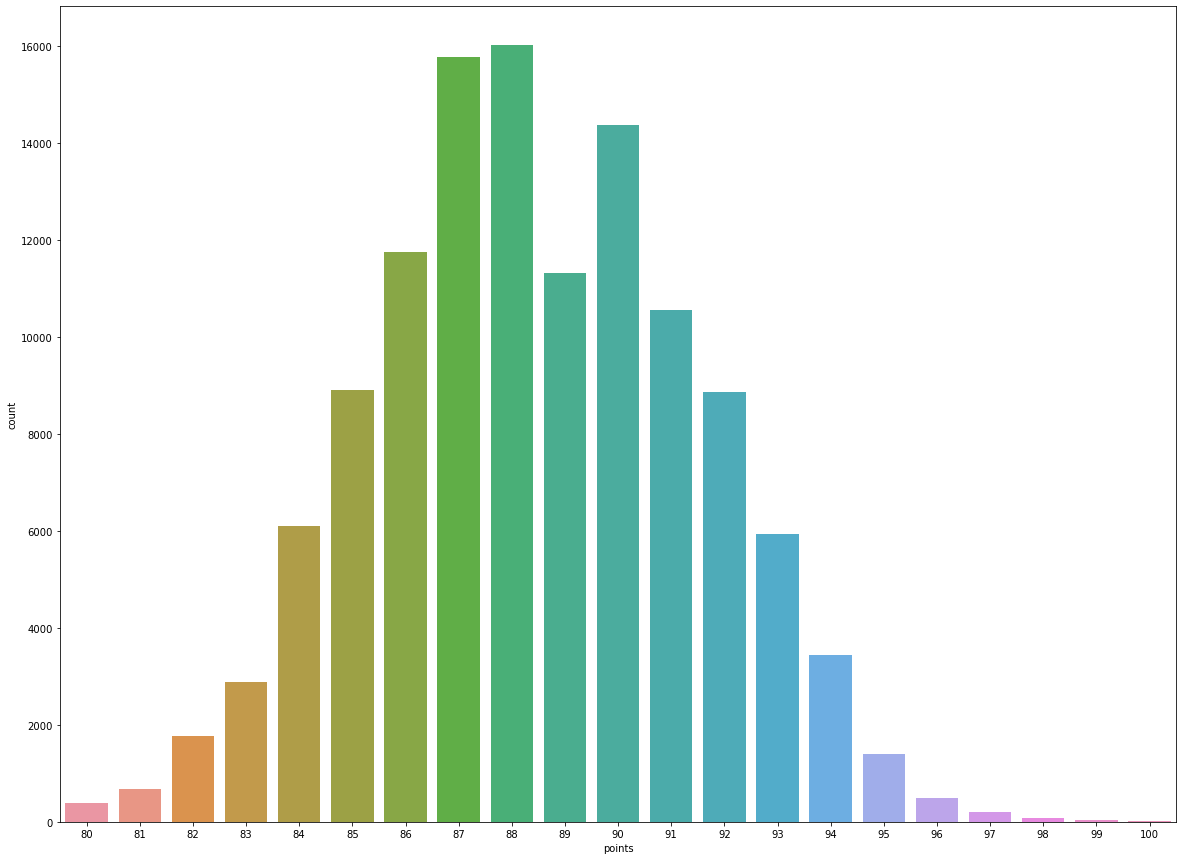

In [7]:
plt.figure(figsize=(20,15)) 
ax = sns.countplot(x="points", data=wine_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.show()

In [8]:
# Analyze Stats for Price
mean = np.mean(wine_data['points'])
median = np.median(wine_data['points'])
mini = np.min(wine_data['points'])
maxi = np.max(wine_data['points'])
stddev = np.std(wine_data['points'])

print('SUMMARY STATS FOR POINTS OF WINE IN THE DATASET')
print('Mean: ', mean, '\nStd Dev: ', stddev, '\nMedian: ', median, '\nMin: ', mini, '\nMax: ', maxi)

SUMMARY STATS FOR POINTS OF WINE IN THE DATASET
Mean:  88.42188055383343 
Std Dev:  3.044495379452498 
Median:  88.0 
Min:  80 
Max:  100


**As we can see, we have a pretty mixed dataset. Most of the wine is from the US, followed by France, Italy, Spain, and Portugal. However, we can see that there are a lot of different countries in our dataset. The points of the data set follow a fairly normal distribution centered around between 87 and 89 points. We can see that there are a lot of bottles in the 84-93 range and the values outside that range drop as they get further away from that range. There are a lot of wine prices in our datset, but the average is around x. The highest priced wine bottle in this dataset is x and the cheapest is x.**

**Hypothesis Testing**

To start this part of the process, I first want to examine some of the correlation 

In [9]:
wine_data.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


In [10]:
less_than_100 = wine_data[wine_data["price"] <= 100]
less_than_100.corr()

,points,price
points,1.000000,0.548092
price,0.548092,1.000000


In [11]:
less_than_50 = wine_data[wine_data["price"] <= 50]
less_than_50.corr()

,points,price
points,1.000000,0.497463
price,0.497463,1.000000


In [12]:
# store the feature matrix (X) and response vector (y)
x = wine_data['price'].values.reshape(-1,1)
y = wine_data['points'].values.reshape(-1,1)

print(x.size)
print(y.size)

#Ensure both equal each other and match up

120975
120975


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  

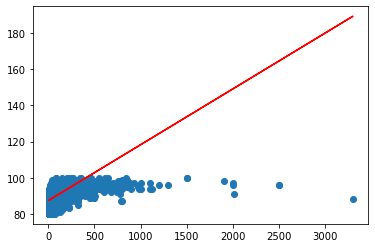

In [14]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()

In this case we can see that a simple linear regression model may not make sense for all of the data points, However let's attempt it for the miniture data set we created earlier.

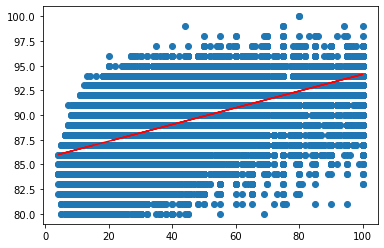

In [15]:
x1 = less_than_100['price'].values.reshape(-1,1)
y1 = less_than_100['points'].values.reshape(-1,1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x1, y1)  # perform linear regression
Y_pred = linear_regressor.predict(x1)  
plt.scatter(x1, y1)
plt.plot(x1, Y_pred, color='red')
plt.show()

This seems to match our data somewhat better, however are there other approaches we can utilize.

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared: 0.1231418059693582


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

CV mean score:  -64.99471316517506
MSE:  8.387096044012836
RMSE:  2.8960483497367298


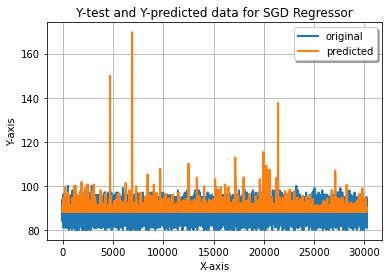

In [23]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.25)
sgdr = SGDRegressor()

sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

cv_score = cross_val_score(sgdr, x, y, cv = 10)
print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=2, label="original")
plt.plot(x_ax, ypred, linewidth=2.1, label="predicted")
plt.title("Y-test and Y-predicted data for SGD Regressor")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Above we use SGDRegressor() to implement a plain stochastic gradient descent (SGD) learning routine. This routine utilizes different loss functions and penalties in order to fit linear regression models for the training data above. With the large Root and MSE value we can see this is not a perfect regression model. The pearson-correlation values we looked at prior to implementing this makes these graphs make sense. We can see this as price may not be the greatest indicator of points after a certain price. It appears that the point system

**Communication of insights attained**

Contrary to popular belief there are many bottles that are great and relatively cheap An example search with results is shown below.

In [ ]:
less_than_15_dollars = wine_data[wine_data["price"] <= 20]
cheap_excellent = less_than_15_dollars[less_than_15_dollars["points"] >= 95]
cheap_excellent.head(5)

In [ ]:
one_hundred_points = wine_data[wine_data["points"] == 99]
one_hundred_points.head()

I intend on exploring some of the options above. However, one note is that with such a p-value it may seem like a done deal to not think that expensive bottles of wine may be worth it, but that is not the goal of this process. The process is meant to uncover the hidden gems that are not explored and to understand wine does not have to be elitist. Be safe, enjoy responsibly, and thank you for a great semester!
Visit local winery. For Maryland the link is provided below. This project was very insightful in seeing the value of that 20-25 bottle of wine. In that range, there appears to be a ton of value and the bottles listed above are just a small example of that.

<a href="https://marylandwine.com/map/">Interactive Wine Map of Maryland</a>